<a href="https://colab.research.google.com/github/n-bzy/iannwtf/blob/main/homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

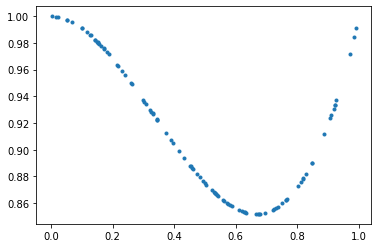

Avg. loss of last epoch:  0.0008528775508072511


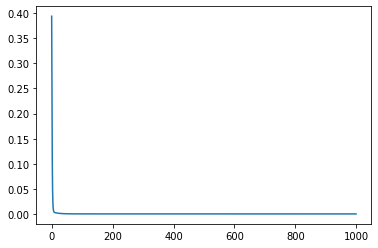

In [19]:
# -*- coding: utf-8 -*-
"""
homework02.ipynb

Automatically generated by Colaboratory.
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import tensorflow as tf

class Layer:
  """Creates a layer of n perceptrons"""
  def __init__(self, n_units, input_units):
    """Constructor sets up the weights (random values), bias (zeros), 
    layer input, layer preactivation and layer activation"""
    self.bias = np.zeros((1,n_units))
    self.weights = np.random.normal(size=(input_units, n_units))
    self.layer_input = None
    self.layer_preactivation = None
    self.layer_activation = None

  def forward_step(self, input):
    """Return each units activation using ReLu as activation function 
    given the input"""
    # Add [1] at the end of input vector for calc of bias
    self.layer_input = np.append(input,[1],axis=0) 
    # Link weights and bias in one matrix
    w_b = np.append(self.weights,self.bias,axis=0) 
    # Matrix multiplikation of layer input and W-Matrix for layer preactivation
    self.layer_preactivation = self.layer_input@w_b
    # ReLu activation function
    output = np.maximum(0,self.layer_preactivation) 
    # Save output in layer_activation for backpropagation
    self.layer_activation = output
    return output
  
  def backward_step(self, input, l_a,gamma = 0.001):
    """Updates layers parameters (weigths and bias) by calculating the
    gradients dL/dW, dL/db and dL/di and applying the learning rate gamma"""
    # Derivative of ReLu = 1
    # Gradient w.r.t. layers weights
    grad_l_w = input.transpose()@(np.maximum(0,1)*l_a)
    # Gradient w.r.t. layers bias
    grad_l_b = (np.maximum(0,1)*l_a)                      
    # Gradient w.r.t. layers input = output/activation of layer l-1
    grad_l_i = (np.maximum(0,1)*l_a)@self.weights.transpose()  
    # Updating of layers parameters with learning rate gamma
    self.weights = self.weights - gamma*grad_l_w
    self.bias = self.bias - gamma*grad_l_b
    # Return gradient w.r.t. layers input for the preivous layers backward_step
    return grad_l_i

class MLP:
  """Creates a Multi-Layer-Perceptron which combines instances of class Layer"""
  def __init__(self, n_layers, n_units, input_units):
    """Contructor to set up the each layer of the MLP as objects in a list"""
    self.n_layers = n_layers
    self.n_units = n_units
    # Create a list of all layers (n_layers) with respective n units
    self.layers = []
    for n in range(n_layers):
      self.layers.append(Layer(n_units[n], input_units[n]))

  def forward_step(self, input):
    """Passes an input through the entire network and returns the output"""
    # Convert input into numpy-array for matrix multiplication in forward_step
    input = np.array(input)
    # For each layer in the MLP do a forward_step with given input 
    for n in range(self.n_layers):
      y = self.layers[n].forward_step(input)
      # Save output as input for the next layer
      input = y
    return y #output

  def backpropagation(self, l_d, input):
    """Updates all weights and bias in the network given the loss derivative"""
    # Convert l_d into numpy-array for matrix multiplication in backward_step
    l_d = np.array([l_d])
    # For each layer starting at the last (output) perform a backward step
    for n in range(self.n_layers-1, -1,-1):
      # First layer
      if n == 0:
        # Input equals input of the MLP
        inp = np.array([input])
      # Every other layer
      else:
        # Input equals output of previous layer
        inp = np.array([self.layers[n-1].layer_activation])
      # Perform backward step in layer n and save the gradient d_L/d_input
      grad_l_i = self.layers[n].backward_step(inp, l_d)
      # d_l/d_input is the new d_l/d_activation for the previous layer
      l_d = np.array(grad_l_i)

# Creating 100 random input values x
x = np.random.rand(100,1)
# Create target t given x
t = x**3-x**2+1

# Plot the random values x and its respective targets
plt.plot(x, t, '.')
plt.show()

# Create the MLP with 1 hidden layer (10 neurons) and 1 output layer (1 neuron)
mlp = MLP(2, [10,1], [1, 10])
# Create a list to save the loss for visualization
safeloss = []

# Training of MLP for n Epochs
epoch = 1000 # Use smaller epochs for better visualization
for n in range(epoch):
  z = np.empty(x.size)
  # For each data point, have the MLP perform a forward step using
  # the input value and then propagate the error backwards through the
  # network
  for k in range(x.size):
    output = mlp.forward_step(x[k])
    loss = (1/2*(output - t[k])**2) 
    z[k] = loss
    # Derivative of loss: l_d
    l_d = np.subtract(output,t[k])
    mlp.backpropagation(l_d, x[k])
  # Average all losses of one epoch
  y = np.mean(z)
  # Add the average loss of the epoch to the safeloss list
  safeloss.append(y)
# Print avg. loss of last epoch for further visualization
print("Avg. loss of last epoch: ",safeloss[-1])

# Visualization: Epochs (x-axis) and average loss (y-axis)
plt.plot(range(epoch), safeloss)
plt.show()